<div style =   "color           : white  ;
                display         : flex   ;
                align-items     : center ;
                justify-content : center ;
                border-radius   : 5px    ;
                background-color: #141f1f;
                font-size       : 200%   ;
                font-family     : Verdana;
                letter-spacing  : 0.5px   " >

<p style = "padding: 20px;
            margin : auto;
            color  : white"    >
 Startup Expansion Explory Data Analysis
</p>
</div>



<div style =   "color           : white  ;
                display         : fill   ;
                border-radius   : 5px    ;
                background-color: #283e3e;
                font-size       : 150%   ;
                font-family     : Verdana;
                letter-spacing  : 0.5px   " >

<p style = "padding: 30px;
            color  : white"    >
Author  : Ezzat Hegazy.<br>
Date    : 20 JUNE 2023.<br>
Version : 1.
</p>
</div>

<div style =   "color           : white  ;
                display         : fill   ;
                border-radius   : 5px    ;
                background-color: #133926;
                font-size       : 150%   ;
                font-family     : Verdana;
                letter-spacing  : 0.5px   " >

<p style = "padding: 15px;
            color  : white"    >
Toolkit
</p>
</div>

In [109]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from IPython.display import display, HTML

from dash.dependencies import Input, Output, State 
from dash import dcc 
from dash import html 
import dash_bootstrap_components as dbc 
import plotly.express as px 
import plotly.figure_factory as ff
import plotly.io as pio

%matplotlib inline
sns.set(rc={'figure.figsize': [10, 4]}, font_scale=1.3)
pio.templates.default = "plotly_dark"

In [95]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th 
{
    border: 2px black solid !important;
    color: white !important;
}
</style>


In [96]:
font1 = {'family':'serif','color':'black','size':25}
font2 = {'family':'serif','color':'#374c80','size':18}

<div style =   "color           : white  ;
                display         : fill   ;
                border-radius   : 5px    ;
                background-color: #133926;
                font-size       : 150%   ;
                font-family     : Verdana;
                letter-spacing  : 0.5px   " >

<p style = "padding: 15px;
            color  : white"    >
Import and Inspect df
</p>
</div>

In [129]:
df = pd.read_excel(r"StartupExpansion.xlsx")
df.head(10)

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
0,1,Peoria,Arizona,Region 2,Old,2601,48610
1,2,Midland,Texas,Region 2,Old,2727,45689
2,3,Spokane,Washington,Region 2,Old,2768,49554
3,4,Denton,Texas,Region 2,Old,2759,38284
4,5,Overland Park,Kansas,Region 2,Old,2869,59887
5,6,Yonkers,New York,Region 1,Old,3080,53827
6,7,Birmingham,Alabama,Region 1,Old,3110,60338
7,8,Antioch,California,Region 2,Old,2593,19569
8,9,Worcester,Massachusetts,Region 1,Old,2675,59840
9,10,Rochester,New York,Region 1,Old,2984,64906


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Store ID         150 non-null    int64 
 1   City             150 non-null    object
 2   State            150 non-null    object
 3   Sales Region     150 non-null    object
 4   New Expansion    150 non-null    object
 5   Marketing Spend  150 non-null    int64 
 6   Revenue          150 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 8.3+ KB


In [99]:
df.describe(include = object)

,City,State,Sales Region,New Expansion
count,150,150,150,150
unique,149,35,2,2
top,Rochester,California,Region 2,Old
freq,2,40,86,140


In [100]:
df[['Marketing Spend' , 'Revenue']].describe().round(2)

,Marketing Spend,Revenue
count,150.00,150.00
mean,2893.15,39301.43
std,367.86,15465.75
min,1811.00,15562.00
25%,2662.25,21113.50
50%,2898.00,42993.00
75%,3111.50,51145.50
max,3984.00,68828.00


In [101]:
sample = df.sample(10)
sample

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
130,131,Savannah,Georgia,Region 1,Old,2028,36029
60,61,Columbia,South Carolina,Region 1,Old,2874,42803
131,132,West Jordan,Utah,Region 2,Old,2773,21056
83,84,Cambridge,Massachusetts,Region 1,Old,2779,21286
125,126,Sandy Springs,Georgia,Region 1,Old,2759,18942
123,124,Daly City,California,Region 2,Old,2658,20703
112,113,Knoxville,Tennessee,Region 2,Old,3086,56504
139,140,Providence,Rhode Island,Region 1,Old,3191,62337
79,80,Costa Mesa,California,Region 2,Old,2275,41361
145,146,Paterson,New Jersey,Region 1,New,2251,34603


<div style =   "color           : white  ;
                display         : fill   ;
                border-radius   : 5px    ;
                background-color: #133926;
                font-size       : 150%   ;
                font-family     : Verdana;
                letter-spacing  : 0.5px   " >

<p style = "padding: 15px;
            color  : white"    >
Preprocessing
</p>
</div>

In [102]:
df.isna().sum()

Store ID           0
City               0
State              0
Sales Region       0
New Expansion      0
Marketing Spend    0
Revenue            0
dtype: int64

In [103]:
df.duplicated().sum()

0

In [104]:
df["City"].value_counts()

Rochester        2
Killeen          1
Wichita Falls    1
Naperville       1
Clovis           1
                ..
Akron            1
Fullerton        1
Manchester       1
Everett          1
Thousand Oaks    1
Name: City, Length: 149, dtype: int64

In [105]:
df["State"].value_counts()

California        40
Texas             17
Florida           12
Washington         7
Colorado           5
Illinois           5
Georgia            4
Alabama            4
Connecticut        4
New Jersey         4
Arizona            3
Tennessee          3
Iowa               3
Michigan           3
South Carolina     3
Utah               3
Massachusetts      3
Kansas             3
New York           3
Louisiana          2
North Carolina     2
Ohio               2
Virginia           2
Oregon             2
Mississippi        1
New Mexico         1
Arkansas           1
New Hampshire      1
Oklahoma           1
Montana            1
Indiana            1
South Dakota       1
Minnesota          1
Wisconsin          1
Rhode Island       1
Name: State, dtype: int64

<div style =   "color           : white  ;
                display         : fill   ;
                border-radius   : 5px    ;
                background-color: #133926;
                font-size       : 150%   ;
                font-family     : Verdana;
                letter-spacing  : 0.5px   " >

<p style = "padding: 15px;
            color  : white"    >
EDA
</p>
</div>

### Number of stores per Region

In [117]:
fig = px.histogram(df, x="Sales Region", 
                   title="Number of stores per Region", l)
fig.show()

### Number of stores per state

In [118]:
fig = px.histogram(df, x="State", title= "Number of stores per State")
fig.show()

### Marketing spend per Region

In [119]:
fig = px.histogram(df, x="Sales Region", y="Marketing Spend", title="Marketing spend per Region")
fig.show()

### Revenue per Region

In [121]:
fig = px.histogram(df, x="Sales Region", y="Revenue", title="Revenue per Region")
fig.show()

### New VS. Old Stores

In [52]:
df.groupby('New Expansion')['Sales Region'].value_counts().unstack()

Sales Region,Region 1,Region 2
New Expansion,,
New,3,7
Old,61,79


In [134]:
fig = px.pie(df, values="Revenue", 
             names="State", 
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

### Top 10 Revenue by state for Old stores

In [57]:
df[df["New Expansion"] == 'Old'].groupby(['State']).sum()['Revenue'].nlargest(10)

C:\Users\shehab\AppData\Local\Temp\ipykernel_15480\3954712846.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df[df["New Expansion"] == 'Old'].groupby(['State']).sum()['Revenue'].nlargest(10)


State
California     1362468
Texas           554964
Florida         479023
Washington      298013
Alabama         221025
New York        160046
Connecticut     158511
Georgia         157656
Colorado        156495
Michigan        147759
Name: Revenue, dtype: int64

### Top 10 Revenue by state for New stores

In [55]:
df[df['New Expansion']=='New'].groupby(['State']).sum()['Revenue'].nlargest(10)

C:\Users\shehab\AppData\Local\Temp\ipykernel_15480\1263289954.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df[df['New Expansion']=='New'].groupby(['State']).sum()['Revenue'].nlargest(10)


State
California    141883
Illinois       91692
Texas          85605
Tennessee      55357
Arizona        48954
New Jersey     34603
Name: Revenue, dtype: int64

### Top 10 states by Revenue

In [58]:
df[['State' ,'Sales Region', 'Revenue' ]].sort_values(by='Revenue',ascending=False).head(10).style.background_gradient(cmap = 'coolwarm')

,State,Sales Region,Revenue
63,Arkansas,Region 2,68828
31,Michigan,Region 1,65475
9,New York,Region 1,64906
37,California,Region 2,64302
146,Texas,Region 2,63148
17,California,Region 2,63027
139,Rhode Island,Region 1,62337
6,Alabama,Region 1,60338
4,Kansas,Region 2,59887
44,California,Region 2,59870


### Max and Min Revenue

In [69]:
df[df['Revenue'] == df['Revenue'].max()][['City','State','Marketing Spend','Revenue']]

,City,State,Marketing Spend,Revenue
63,Little Rock,Arkansas,2440,68828


In [70]:
df[df['Revenue'] == df['Revenue'].min()][['City','State','Marketing Spend','Revenue']]

,City,State,Marketing Spend,Revenue
53,Everett,Washington,3129,15562


### Max and Min Marketing spend

In [71]:
df[df['Marketing Spend'] == df['Marketing Spend'].max()][['City','State','Marketing Spend','Revenue']]

,City,State,Marketing Spend,Revenue
86,Amarillo,Texas,3984,56089


### Low Marketing spend and High Revenue

In [76]:
lh_data = df[(df['Marketing Spend'] < df['Marketing Spend'].mean()) & (df['Revenue'] > df['Revenue'].mean())]
lha_data = lh_data.groupby('State', as_index = False).count().sort_values(by = 'Revenue', ascending = False).reset_index()[['State','City']]

Text(0.5, 0, 'Count')

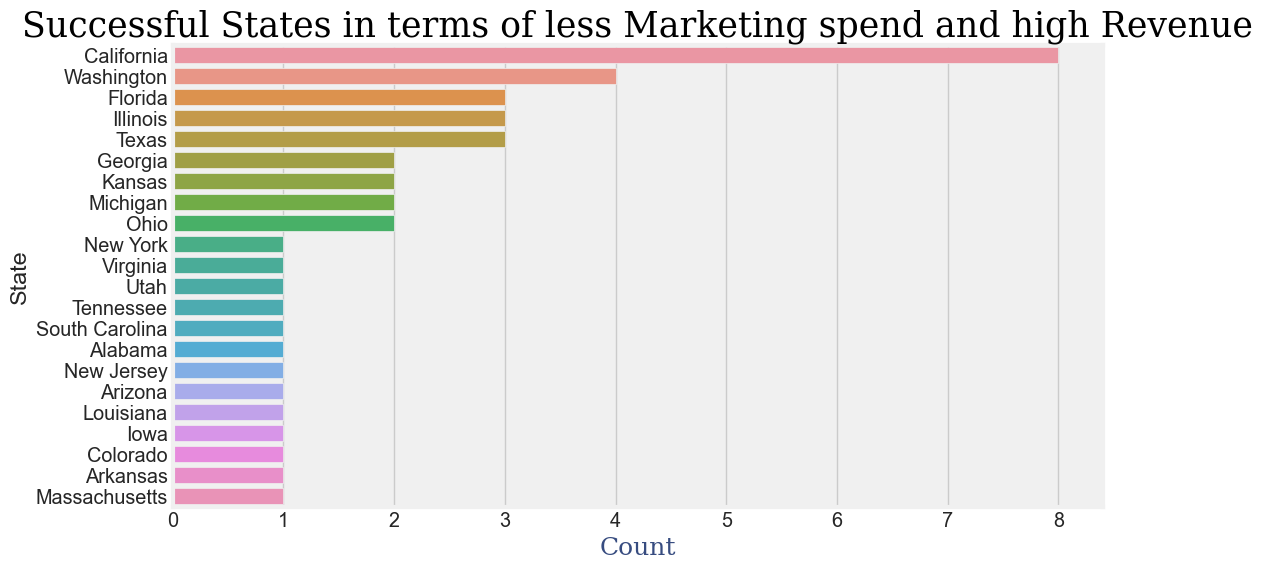

In [77]:
plt.figure(figsize=(12,6))
plt.style.use('fivethirtyeight')
sns.barplot(x    = 'City',
            y    = 'State',
            data = lha_data)
plt.title('Successful States in terms of less Marketing spend and high Revenue' , fontdict = font1)
plt.xlabel('Count' , fontdict = font2)

### ROI

In [78]:
df['Profit'] = df['Revenue'] - df['Marketing Spend']
df.head(5)

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Profit
0,1,Peoria,Arizona,Region 2,Old,2601,48610,46009
1,2,Midland,Texas,Region 2,Old,2727,45689,42962
2,3,Spokane,Washington,Region 2,Old,2768,49554,46786
3,4,Denton,Texas,Region 2,Old,2759,38284,35525
4,5,Overland Park,Kansas,Region 2,Old,2869,59887,57018


### Calculate Return on marketing spend (ROMS)

In [80]:
df['ROMS '] = round(( (df['Profit'] / df['Marketing Spend'])  * 100) , 2)
df.head(5)

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Profit,ROMS
0,1,Peoria,Arizona,Region 2,Old,2601,48610,46009,1768.90
1,2,Midland,Texas,Region 2,Old,2727,45689,42962,1575.43
2,3,Spokane,Washington,Region 2,Old,2768,49554,46786,1690.25
3,4,Denton,Texas,Region 2,Old,2759,38284,35525,1287.60
4,5,Overland Park,Kansas,Region 2,Old,2869,59887,57018,1987.38


In [82]:
df['ROMS  %'] = round(df['ROMS '] / 100 , 2)
df.head(5)

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Profit,ROMS,ROMS %
0,1,Peoria,Arizona,Region 2,Old,2601,48610,46009,1768.90,17.69
1,2,Midland,Texas,Region 2,Old,2727,45689,42962,1575.43,15.75
2,3,Spokane,Washington,Region 2,Old,2768,49554,46786,1690.25,16.90
3,4,Denton,Texas,Region 2,Old,2759,38284,35525,1287.60,12.88
4,5,Overland Park,Kansas,Region 2,Old,2869,59887,57018,1987.38,19.87


In [87]:
df["ROMS  %"].describe()

count    150.000000
mean      12.743800
std        5.478946
min        3.960000
25%        6.377500
50%       14.060000
75%       16.607500
max       27.210000
Name: ROMS  %, dtype: float64

In [88]:
df.to_csv("StartupsExpansion-modified.csv")